In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import skew
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#wyświetl wszystkie wiersze i kolumny
pd.options.display.max_rows = None
pd.options.display.max_columns = None

# dane do modelu

In [2]:
df = pd.read_csv('pm25.csv',index_col = 0, header = 0)
df.head()

,Rok,Miesiąc,Dzień,Godzina,Wysokość_podstawy_niższej_[m],Wysokość_podstawy_wyższej_[m],Widzialność_operatora_[m],Widzialność_automat_[m],Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Poryw_wiatru_[m/s],Temperatura_powietrza_[°C],Temperatura_termometru_zwilżonego_[°C],Ciśnienie_pary_wodnej_[hPa],Wilgotność_względna_[%],Temperatura_punktu_rosy_[°C],Ciśnienie_na_pozimie_stacji_[hPa],Ciśnienie_na_pozimie_morza_[hPa],Wartość_tendencji_[wartość],Opad_za_6_godzin_[mm],Status_pomiaru_WO6G,Status_pomiaru_ROPT,Zachmurzenie_niskie_[oktanty],Niedosyt_wilgotności_[hPa},Usłonecznienie,Poryw_maksymalny_za_okres_WW_[m/s],Temperatura_gruntu_-5_[°C],Temperatura_gruntu_-10_[°C],Temperatura_gruntu_-20_[°C],Temperatura_gruntu_-50_[°C],Temperatura_gruntu_-100_[°C],Status_pomiaru_TG100,Temperatura_minimalna_za_12_godzin_[°C],Status_pomiaru_TMIN,Temperatura_maksymalna_za_12_godzin_[°C],Status_pomiaru_TMAX,Temperatura_minimalna_przy_gruncie_za_12_godzin_[°C],Status_pomiaru_TGMI,Równoważnik_wodny_śniegu_[mm/cm],Status_pomiaru_RWSN,Wysokość_pokrywy_śnieżnej_[cm],Status_pomiaru_PKSN,Wysokość_świeżo_spadłego_śniegu_[cm],Wysokość_śniegu_na_poletku_[cm],Wysokość_próbki_[cm],Ciężar_próbki_[g],Niepodległości,dzien_tygodnia,pm25lag
2014-01-01 01:00:00,2014.0,1.0,1.0,1.0,210.0,0.0,7000.0,0.0,8.0,119.0,4.0,0.0,1.0,0.0,6.1,93.0,0.0,1009.5,1023.0,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,100.325798,3,100.325798
2014-01-01 02:00:00,2014.0,1.0,1.0,2.0,210.0,0.0,7000.0,0.0,8.0,128.0,4.0,0.0,1.2,0.0,6.1,92.0,0.0,1009.0,1022.5,-1.0,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,69.412430,3,100.325798
2014-01-01 03:00:00,2014.0,1.0,1.0,3.0,210.0,0.0,7000.0,0.0,8.0,134.0,3.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.6,1022.1,-1.2,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,40.967861,3,69.412430
2014-01-01 04:00:00,2014.0,1.0,1.0,4.0,210.0,0.0,7000.0,0.0,8.0,129.0,4.0,0.0,1.3,0.0,6.2,92.0,0.1,1008.2,1021.7,-1.3,0.0,8.0,8.0,7.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,37.308937,3,40.967861
2014-01-01 05:00:00,2014.0,1.0,1.0,5.0,210.0,0.0,7000.0,0.0,8.0,137.0,4.0,0.0,1.3,0.0,6.1,91.0,0.0,1008.2,1021.7,-0.8,0.0,8.0,8.0,7.0,0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,38.185955,3,37.308937


In [4]:
df2 = pd.read_csv('data_pm25_plus_darksky.csv',index_col = 0, header = 0)
df2.head()

,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break
0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0
1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0
2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0
3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0
4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0


In [5]:
df2['pm25_nie'].describe()

count    43853.000000
mean        25.296143
std         16.907685
min          0.877018
25%         13.535946
50%         20.661466
75%         31.902000
max        187.930147
Name: pm25_nie, dtype: float64

In [6]:
df['Niepodległości'].describe()

count    43824.000000
mean        26.164206
std         17.567092
min          0.832811
25%         13.588240
50%         21.513400
75%         33.546879
max        187.930147
Name: Niepodległości, dtype: float64

In [7]:
df.columns

Index(['Rok', 'Miesiąc', 'Dzień', 'Godzina', 'Wysokość_podstawy_niższej_[m]',
       'Wysokość_podstawy_wyższej_[m]', 'Widzialność_operatora_[m]',
       'Widzialność_automat_[m]', 'Zachmurzenie_ogólne_[oktanty]',
       'Kierunek_wiatru_[°]', 'Prędkość_wiatru_[m/s]', 'Poryw_wiatru_[m/s]',
       'Temperatura_powietrza_[°C]', 'Temperatura_termometru_zwilżonego_[°C]',
       'Ciśnienie_pary_wodnej_[hPa]', 'Wilgotność_względna_[%]',
       'Temperatura_punktu_rosy_[°C]', 'Ciśnienie_na_pozimie_stacji_[hPa]',
       'Ciśnienie_na_pozimie_morza_[hPa]', 'Wartość_tendencji_[wartość]',
       'Opad_za_6_godzin_[mm]', 'Status_pomiaru_WO6G', 'Status_pomiaru_ROPT',
       'Zachmurzenie_niskie_[oktanty]', 'Niedosyt_wilgotności_[hPa}',
       'Usłonecznienie', 'Poryw_maksymalny_za_okres_WW_[m/s]',
       'Temperatura_gruntu_-5_[°C]', 'Temperatura_gruntu_-10_[°C]',
       'Temperatura_gruntu_-20_[°C]', 'Temperatura_gruntu_-50_[°C]',
       'Temperatura_gruntu_-100_[°C]', 'Status_pomiaru_TG100',
    

In [8]:
df2.columns

Index(['date', 'pm25_nie', 'pm25_kon', 'pm25_wok', 'apparentTemperature',
       'cloudCover', 'dewPoint', 'humidity', 'icon', 'ozone',
       'precipAccumulation', 'precipIntensity', 'precipProbability',
       'precipType', 'pressure', 'summary', 'temperature', 'time', 'uvIndex',
       'visibility', 'windBearing', 'windGust', 'windSpeed', 'year', 'month',
       'day', 'hour', 'day_of_week', 'no_of_week', 'winter_break'],
      dtype='object')

In [12]:
feats2 = ['year','month','day','hour',
         'cloudCover',
         'windBearing',
         'windSpeed',
         'temperature',
         'humidity',
         'pressure',
         'day_of_week']

In [13]:
df2[(df2["date"]>="2015-01-01 09:00:00")][(df2["date"]<"2015-01-01 12:00:00")][feats2]

,year,month,day,hour,cloudCover,windBearing,windSpeed,temperature,humidity,pressure,day_of_week
9,2015,1,1,9,1.00,270.0,8.13,35.55,0.95,1028.000000,4
10,2015,1,1,10,1.00,270.0,10.35,35.54,0.95,1028.100000,4
11,2015,1,1,11,0.99,281.0,11.44,35.55,1.00,1027.833333,4


In [14]:
feats = ['Miesiąc', 'Dzień', 'Godzina',
         'Zachmurzenie_ogólne_[oktanty]',
         'Kierunek_wiatru_[°]',
         'Prędkość_wiatru_[m/s]',
         'Temperatura_powietrza_[°C]',
         'Wilgotność_względna_[%]',
         'Ciśnienie_na_pozimie_morza_[hPa]',
         'dzien_tygodnia','pm25lag']

In [15]:
df[(df["Rok"]==2015)][(df["Miesiąc"]==1)][(df["Dzień"]==1)][(df["Godzina"]>=9)][(df["Godzina"]<12)][feats]

,Miesiąc,Dzień,Godzina,Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Temperatura_powietrza_[°C],Wilgotność_względna_[%],Ciśnienie_na_pozimie_morza_[hPa],dzien_tygodnia,pm25lag
2015-01-01 09:00:00,1.0,1.0,9.0,8.0,272.0,6.0,2.0,98.0,1028.1,4,24.4582
2015-01-01 10:00:00,1.0,1.0,10.0,8.0,275.0,6.0,2.0,98.0,1027.8,4,22.4132
2015-01-01 11:00:00,1.0,1.0,11.0,8.0,281.0,6.0,2.4,97.0,1027.5,4,22.0860


In [16]:
#df2[(df2["pm25_nie"]>=50)][(df2["pm25_nie"]<60)][feats2].describe()
df2[feats2].describe()

,year,month,day,hour,cloudCover,windBearing,windSpeed,temperature,humidity,pressure,day_of_week
count,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000
mean,2017.000000,6.520922,15.721137,11.498917,0.575709,193.698265,7.524209,50.739092,0.725362,1016.543833,3.999247
std,1.413843,3.450052,8.804220,6.922614,0.327405,93.865781,3.951228,16.258938,0.180586,8.845515,2.001259
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-4.840000,0.120000,975.200000,1.000000
25%,2016.000000,4.000000,8.000000,5.000000,0.250000,115.000000,4.680000,37.870000,0.600000,1011.400000,2.000000
50%,2017.000000,7.000000,16.000000,11.000000,0.720000,206.000000,6.930000,49.890000,0.760000,1016.600000,4.000000
75%,2018.000000,10.000000,23.000000,17.000000,0.870000,270.000000,9.830000,63.380000,0.870000,1022.200000,6.000000
max,2019.000000,12.000000,31.000000,23.000000,1.000000,359.000000,38.780000,96.790000,1.000000,1046.700000,7.000000


In [17]:
#df[(df["Niepodległości"]>=50)][(df["Niepodległości"]<60)][feats].describe()
df[feats].describe()

,Miesiąc,Dzień,Godzina,Zachmurzenie_ogólne_[oktanty],Kierunek_wiatru_[°],Prędkość_wiatru_[m/s],Temperatura_powietrza_[°C],Wilgotność_względna_[%],Ciśnienie_na_pozimie_morza_[hPa],dzien_tygodnia,pm25lag
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,6.524302,15.729874,11.501620,5.177665,179.081109,3.400192,9.998210,74.722093,1016.626936,4.000936,26.165856
std,3.448167,8.798321,6.921395,2.683756,97.877295,2.002007,9.004835,17.806413,8.509418,2.000040,17.570661
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-18.600000,19.000000,975.200000,1.000000,0.832811
25%,4.000000,8.000000,6.000000,3.000000,104.000000,2.000000,3.000000,62.000000,1011.400000,2.000000,13.588240
50%,7.000000,16.000000,12.000000,6.000000,170.000000,3.000000,9.600000,79.000000,1016.400000,4.000000,21.513400
75%,10.000000,23.000000,18.000000,7.000000,268.000000,5.000000,17.000000,90.000000,1022.000000,6.000000,33.546879
max,12.000000,31.000000,23.000000,9.000000,360.000000,15.000000,36.200000,100.000000,1045.800000,7.000000,187.930147


In [18]:
df2_lag = df2['pm25_nie'].shift(1)
df2_lag = df2_lag.rename('pm25lag')
df2_lag = df2_lag.fillna(method='bfill')
df2 = pd.concat([df2, df2_lag], axis=1)
df2.head()

,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break,pm25lag
0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0,51.5034
1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0,51.5034
2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0,71.8204
3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0,42.6996
4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0,38.2824


In [19]:
df2["humidity2"] = df2.apply(lambda x: x["humidity"]*100, axis=1)
df2["cloudCover2"] = df2.apply(lambda x: x["cloudCover"]*8, axis=1)
df2["temperature2"] = df2.apply(lambda x: (x["temperature"]-32)/1.8, axis=1)
df2["windSpeed2"] = df2.apply(lambda x: (x["windSpeed"]*16.09344)/36, axis=1)
df2.head()

,date,pm25_nie,pm25_kon,pm25_wok,apparentTemperature,cloudCover,dewPoint,humidity,icon,ozone,precipAccumulation,precipIntensity,precipProbability,precipType,pressure,summary,temperature,time,uvIndex,visibility,windBearing,windGust,windSpeed,year,month,day,hour,day_of_week,no_of_week,winter_break,pm25lag,humidity2,cloudCover2,temperature2,windSpeed2
0,2015-01-01 00:00:00,51.5034,78.085,51.320000,32.93,1.0,29.56,0.87,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,32.93,1.420067e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,0,4,1,0,51.5034,87.0,8.0,0.516667,3.097987
1,2015-01-01 01:00:00,71.8204,78.085,68.982316,33.90,1.0,31.11,0.89,NaN,NaN,0.0,0.0,0.0,NaN,1027.7,NaN,33.90,1.420070e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,1,4,1,0,51.5034,89.0,8.0,1.055556,3.097987
2,2015-01-01 02:00:00,42.6996,64.460,48.707108,27.73,1.0,31.59,0.91,cloudy,NaN,0.0,0.0,0.0,NaN,1027.7,Overcast,33.81,1.420074e+09,0.0,2.733,260.0,6.93,6.93,2015,1,1,2,4,1,0,71.8204,91.0,8.0,1.005556,3.097987
3,2015-01-01 03:00:00,38.2824,36.210,37.986883,27.73,1.0,32.76,0.96,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.81,1.420078e+09,0.0,1.244,251.0,6.93,6.93,2015,1,1,3,4,1,0,42.6996,96.0,8.0,1.005556,3.097987
4,2015-01-01 04:00:00,35.4194,29.585,33.675489,26.41,1.0,32.89,0.97,fog,NaN,0.0,0.0,0.0,NaN,1027.7,Foggy,33.73,1.420081e+09,0.0,1.152,251.0,8.96,8.96,2015,1,1,4,4,1,0,38.2824,97.0,8.0,0.961111,4.005478


In [20]:
feats2 = ['month','day','hour',
         'cloudCover2',
         'windBearing',
         'windSpeed2',
         'temperature2',
         'humidity2',
         'pressure',
         'day_of_week','pm25lag']

In [21]:
df2[feats2].describe()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
count,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000,43853.000000
mean,6.520922,15.721137,11.498917,4.605671,193.698265,3.363622,10.410607,72.536235,1016.543833,3.999247,25.297082
std,3.450052,8.804220,6.922614,2.619239,93.865781,1.766357,9.032744,18.058617,8.845515,2.001259,16.907996
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-20.466667,12.000000,975.200000,1.000000,0.877018
25%,4.000000,8.000000,5.000000,2.000000,115.000000,2.092147,3.261111,60.000000,1011.400000,2.000000,13.535946
50%,7.000000,16.000000,11.000000,5.760000,206.000000,3.097987,9.938889,76.000000,1016.600000,4.000000,20.661466
75%,10.000000,23.000000,17.000000,6.960000,270.000000,4.394403,17.433333,87.000000,1022.200000,6.000000,31.902000
max,12.000000,31.000000,23.000000,8.000000,359.000000,17.336211,35.994444,100.000000,1046.700000,7.000000,187.930147


# modele

In [22]:
y = df['Niepodległości'].values
X = df[feats].values
y2 = df2['pm25_nie'].values
X2 = df2[feats2].values

In [23]:
from math import sqrt
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, median_absolute_error, r2_score
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [24]:
#podział na zbiór treningowy i testowy
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 123)
#X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.7, random_state = 123)
X_train = df[feats].values
y_train = df['Niepodległości'].values
X_train2 = df2[df2["year"]<2019][feats2].values
y_train2 = df2[df2["year"]<2019]['pm25_nie'].values

In [25]:
#Zdefiniowanie funkcji do oceny modelu 2
n_folds = 5

def scoring_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = kf))
    r2= cross_val_score(model, X_train, y_train, scoring="r2", cv = kf)
    return(rmse, r2)
def scoring_cv2(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train2)
    rmse= np.sqrt(-cross_val_score(model, X_train2, y_train2, scoring="neg_mean_squared_error", cv = kf))
    r2= cross_val_score(model, X_train2, y_train2, scoring="r2", cv = kf)
    return(rmse, r2)

In [26]:
#XGBoost Regression
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [27]:
#XGBoost Regression
model_xgb2 = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [28]:
#XGBoost Regression 

score = scoring_cv(model_xgb)
print("Xgboost rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score[0].mean(), score[0].std(), 100*score[1].mean()))

Xgboost rmse: 4.4050 (0.4409), r2: 93.5%



In [29]:
#XGBoost Regression 

score2 = scoring_cv2(model_xgb2)
print("Xgboost rmse: {:.4f} ({:.4f}), r2: {:.1f}%\n" .format(score2[0].mean(), score2[0].std(), 100*score2[1].mean()))

Xgboost rmse: 4.4687 (0.9898), r2: 93.4%



In [30]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [31]:
model_xgb2.fit(X_train2, y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=3, min_child_weight=1.7817, missing=None,
             n_estimators=2200, n_jobs=1, nthread=-1, objective='reg:linear',
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, seed=None, silent=1, subsample=0.5213,
             verbosity=1)

In [59]:
df[feats].to_csv("X_train.csv",index=False)
df['Niepodległości'].to_csv("y_train.csv",index=False)
df2[df2["year"]<2019][feats2].to_csv("X_train2.csv",index=False)
df2[df2["year"]<2019]['pm25_nie'].to_csv("y_train2.csv",index=False)

In [60]:
df.to_csv("df.csv",index=False)
df2.to_csv("df2.csv",index=False)

In [61]:
df2[df2["year"]>=2019][feats2].to_csv("future.csv",index=False)

# dane z 2019

In [32]:
import requests
import pandas as pd
import json
from pandas.io.json import json_normalize
from datetime import datetime

In [40]:
future = df2[df2["year"]>=2019][feats2]
future.head()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
35092,1,1,0,6.96,249.0,3.840074,1.161111,85.0,1027.5,2,25.830589
35093,1,1,1,6.96,238.0,3.527146,1.155556,85.0,1026.3,2,28.016304
35094,1,1,2,7.04,233.0,4.193235,0.777778,87.0,1025.1,2,64.100000
35095,1,1,3,7.36,228.0,4.783328,0.566667,88.0,1023.8,2,44.700000
35096,1,1,4,7.76,225.0,5.444947,1.205556,86.0,1022.5,2,32.900000


# liczenie prognozy

In [41]:
estimatesX = []
estimatesX2 = []

In [42]:
last_p25 = y2[-1]
future[0:1]

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
35092,1,1,0,6.96,249.0,3.840074,1.161111,85.0,1027.5,2,25.830589


In [43]:
for k in range(future.shape[0]):
    if k==0:
        future[k:k+1]["pm25lag"] = last_p25
        prediction = model_xgb.predict(future[k:k+1].values)
    else:
        future[k:k+1]["pm25lag"] = estimatesX[k-1]
        prediction = model_xgb.predict(future[k:k+1].values)
    estimatesX = np.append(estimatesX, prediction)

estimatesX

array([11.27297497, 12.21984482, 12.39796257, ..., 11.70122433,
       10.8435297 , 10.18520355])

In [44]:
estimatesX2 = []
for k in range(future.shape[0]):
    if k==0:
        future[k:k+1]["pm25lag"] = last_p25
        prediction = model_xgb2.predict(future[k:k+1].values)
    else:
        future[k:k+1]["pm25lag"] = estimatesX[k-1]
        prediction = model_xgb2.predict(future[k:k+1].values)
    estimatesX2 = np.append(estimatesX2, prediction)

estimatesX2

array([15.2364769 , 13.01971149, 13.35716057, ..., 12.79730892,
       11.69028378, 10.41294384])

In [188]:
#prediction_xgb = model_xgb.predict(future.values)
#prediction_xgb
#future['pred_xgb'] = prediction_xgb

In [45]:
future['pred_xgb'] = estimatesX
future['pred_xgb2'] = estimatesX2
future['czas'] = future.apply(lambda x: datetime(2019, int(x['month']), int(x['day']), int(x['hour'])), axis=1)
future.head()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag,pred_xgb,pred_xgb2,czas
35092,1,1,0,6.96,249.0,3.840074,1.161111,85.0,1027.5,2,10.300000,11.272975,15.236477,2019-01-01 00:00:00
35093,1,1,1,6.96,238.0,3.527146,1.155556,85.0,1026.3,2,11.272975,12.219845,13.019711,2019-01-01 01:00:00
35094,1,1,2,7.04,233.0,4.193235,0.777778,87.0,1025.1,2,12.219845,12.397963,13.357161,2019-01-01 02:00:00
35095,1,1,3,7.36,228.0,4.783328,0.566667,88.0,1023.8,2,12.397963,11.648069,12.514881,2019-01-01 03:00:00
35096,1,1,4,7.76,225.0,5.444947,1.205556,86.0,1022.5,2,11.648069,10.440777,10.786118,2019-01-01 04:00:00


In [46]:
do_wykresu = future[['month','day','czas','pred_xgb','pred_xgb2']]

# obecne stężenie pm25

In [47]:
pm =  df2[df2["year"]>=2019][['year','month','day','hour','pm25_nie']]    
pm['czas'] = pm.apply(lambda x: datetime(int(x['year']), int(x['month']), int(x['day']), int(x['hour'])), axis=1)
pm.head()


,year,month,day,hour,pm25_nie,czas
35092,2019,1,1,0,28.016304,2019-01-01 00:00:00
35093,2019,1,1,1,64.100000,2019-01-01 01:00:00
35094,2019,1,1,2,44.700000,2019-01-01 02:00:00
35095,2019,1,1,3,32.900000,2019-01-01 03:00:00
35096,2019,1,1,4,25.800000,2019-01-01 04:00:00


In [48]:
#pm['data'] = pm['data'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
do_wykresu.head()

,month,day,czas,pred_xgb,pred_xgb2
35092,1,1,2019-01-01 00:00:00,11.272975,15.236477
35093,1,1,2019-01-01 01:00:00,12.219845,13.019711
35094,1,1,2019-01-01 02:00:00,12.397963,13.357161
35095,1,1,2019-01-01 03:00:00,11.648069,12.514881
35096,1,1,2019-01-01 04:00:00,10.440777,10.786118


# wykres

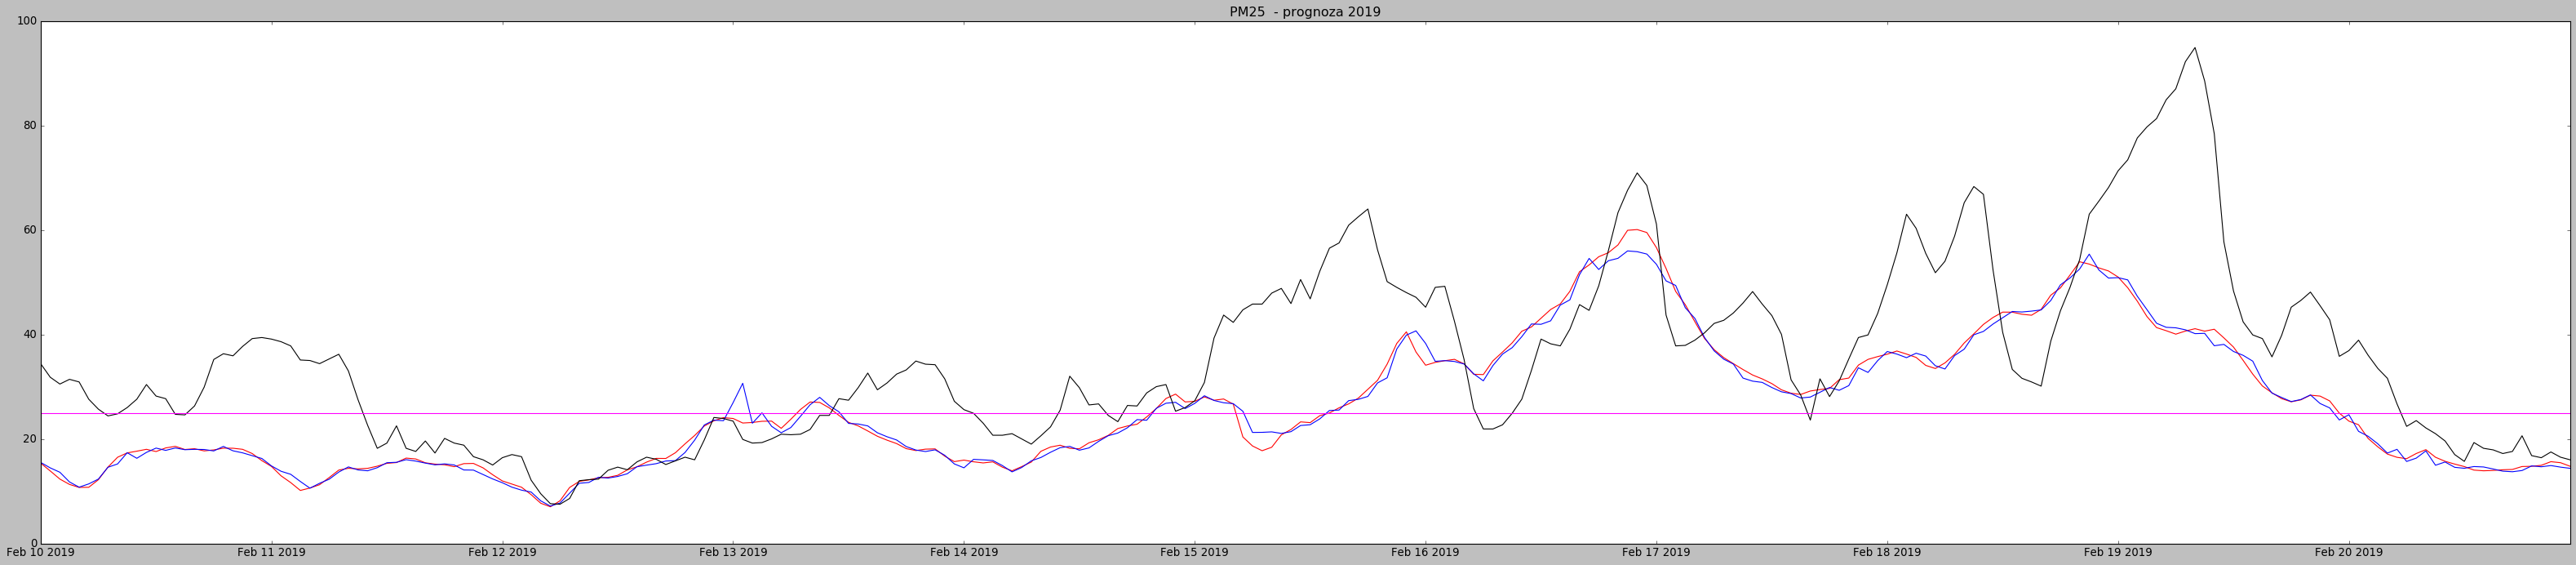

In [286]:
plt.style.use("classic")
mc = 2

d1 = 10
d2 = 20
jeden = do_wykresu[do_wykresu['month']>=mc][do_wykresu['month']<=mc][do_wykresu['day']>=d1][do_wykresu['day']<=d2]
dwa = pm[pm['month']>=mc][pm['month']<=mc][pm['day']>=d1][pm['day']<=d2]
alert = dwa.copy()
alert["pm25_nie"]=25

plt.figure(figsize=(50,10))
plt.plot(jeden['czas'], jeden['pred_xgb'], color='red') #prognoza
plt.plot(jeden['czas'], jeden['pred_xgb2'], color='blue') #prognoza 2
plt.plot(dwa['czas'], dwa['pm25_nie'], color='black') #historia
plt.plot(alert['czas'], alert['pm25_nie'], color='fuchsia') #poziom alert

plt.title('PM25  - prognoza 2019')
plt.show()

In [55]:
do_wykresu["alert"] = 25
do_wykresu["pm25"] = pm['pm25_nie']
do_wykresu.describe()

,month,day,pred_xgb,pred_xgb2,alert,pm25
count,8761.000000,8761.000000,8761.000000,8761.000000,8761.0,8761.000000
mean,6.526424,15.721835,21.686992,21.613013,25.0,24.515485
std,3.448051,8.797072,12.164537,12.009815,0.0,12.779689
min,1.000000,1.000000,-3.579117,1.370011,25.0,5.800000
25%,4.000000,8.000000,13.150853,13.182521,25.0,15.600000
50%,7.000000,16.000000,18.763992,18.535080,25.0,21.200000
75%,10.000000,23.000000,27.013239,26.931606,25.0,29.900000
max,12.000000,31.000000,95.706955,91.873352,25.0,112.400000


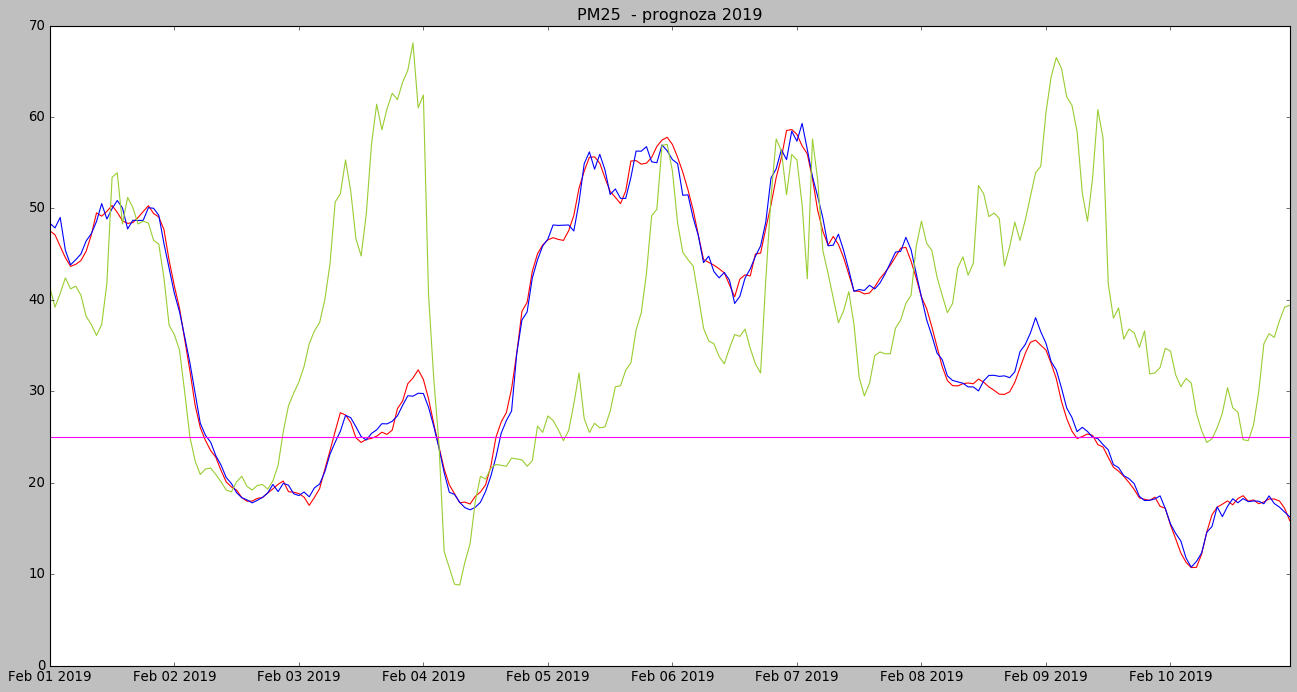

In [180]:
plt.style.use("classic")
mc = 2
d1 = 1
d2 = 10
jeden = do_wykresu[do_wykresu['month']>=mc][do_wykresu['month']<=mc][do_wykresu['day']>=d1][do_wykresu['day']<=d2]

plt.figure(figsize=(20,10))
plt.plot(jeden['czas'], jeden['pred_xgb'], color='red') #prognoza
plt.plot(jeden['czas'], jeden['pred_xgb2'], color='blue') #prognoza 2
plt.plot(jeden['czas'], jeden['pm25'], color='yellowgreen') #historia
plt.plot(jeden['czas'], jeden['alert'], color='fuchsia') #poziom alert

plt.title('PM25  - prognoza 2019')
plt.show()

In [57]:
do_wykresu.to_csv("do_wykresu.csv",index=False)

# podejście klasyfikacyjne - źle, dobrze

In [142]:
def setStatus(x, y, z):
 if x<z and y<z :
     return 1
 if x>=z and y>=z :
     return 1
 return 0

In [143]:
do_wykresu["status"] = do_wykresu.apply(lambda x : setStatus(x["pred_xgb"],x["pm25"],x["alert"]),axis=1)
do_wykresu["status2"] = do_wykresu.apply(lambda x : setStatus(x["pred_xgb2"],x["pm25"],x["alert"]),axis=1)
do_wykresu[["status","status2"]].describe()

,status,status2
count,8761.000000,8761.000000
mean,0.793745,0.797512
std,0.404639,0.401877
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [144]:
do_wykresu.groupby(["status"]).count()

,month,day,czas,pred_xgb,pred_xgb2,alert,pm25,status2
status,,,,,,,,
0,1807,1807,1807,1807,1807,1807,1807,1807
1,6954,6954,6954,6954,6954,6954,6954,6954


In [145]:
do_wykresu.groupby("status2").count()

,month,day,czas,pred_xgb,pred_xgb2,alert,pm25,status
status2,,,,,,,,
0,1774,1774,1774,1774,1774,1774,1774,1774
1,6987,6987,6987,6987,6987,6987,6987,6987


In [197]:
do_wykresu[do_wykresu["status"]!=0].count()["pred_xgb"]/do_wykresu.count()["pred_xgb"]

0.7937450062778222

In [198]:
do_wykresu[do_wykresu["status2"]!=0].count()["pred_xgb2"]/do_wykresu.count()["pred_xgb2"]

0.7975116995776738

In [160]:
klasyfikacja = pd.DataFrame(np.linspace(1,12,12),columns=["month"])

In [167]:
klasyfikacja["dobrze"] = do_wykresu[do_wykresu["status"]!=0].groupby("month").count()["status"].values
klasyfikacja["zle"] = do_wykresu[do_wykresu["status"]==0].groupby("month").count()["status"].values

In [169]:
klasyfikacja

,month,dobrze,zle
0,1.0,660,84
1,2.0,467,205
2,3.0,570,174
3,4.0,531,189
4,5.0,580,164
5,6.0,622,98
6,7.0,688,56
7,8.0,703,41
8,9.0,575,145
9,10.0,577,168


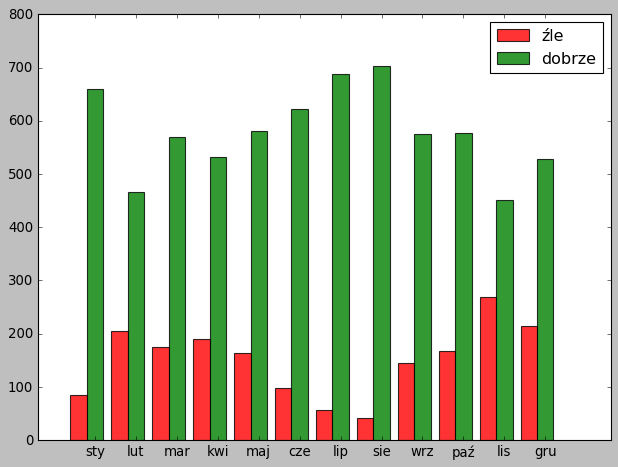

In [196]:
rects1 = plt.bar(klasyfikacja["month"],klasyfikacja["zle"],0.40,alpha=0.8,color='red',label="źle")
rects2 = plt.bar(klasyfikacja["month"]+0.40,klasyfikacja["dobrze"],0.40,alpha=0.8,color='green',label="dobrze")
plt.legend()
plt.tight_layout()
plt.xticks(klasyfikacja["month"] + 0.40, ('sty', 'lut', 'mar', 'kwi','maj','cze','lip','sie','wrz','paź','lis','gru'))
plt.show()

# deep learning

In [223]:
deep_X_train = pd.read_csv('X_train2.csv')
deep_X_train.head()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
0,1,1,0,8.0,260.0,3.097987,0.516667,87.0,1027.7,4,51.5034
1,1,1,1,8.0,260.0,3.097987,1.055556,89.0,1027.7,4,51.5034
2,1,1,2,8.0,260.0,3.097987,1.005556,91.0,1027.7,4,71.8204
3,1,1,3,8.0,251.0,3.097987,1.005556,96.0,1027.7,4,42.6996
4,1,1,4,8.0,251.0,4.005478,0.961111,97.0,1027.7,4,38.2824


In [228]:
deep_X_train.describe()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
count,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000,35092.000000
mean,0.543296,0.507128,0.479122,0.570404,0.022979,0.161686,0.601895,0.731593,0.924391,0.571477,0.127459
std,0.287550,0.284069,0.288443,0.316763,0.011204,0.087738,0.091012,0.181019,0.008018,0.285934,0.088924
min,0.083333,0.032258,0.000000,0.000000,0.000000,0.000000,0.295333,0.160000,0.886545,0.142857,0.004385
25%,0.333333,0.258065,0.208333,0.250000,0.013158,0.102540,0.529722,0.600000,0.919636,0.285714,0.064724
50%,0.583333,0.516129,0.458333,0.730000,0.024282,0.151770,0.597167,0.770000,0.924455,0.571429,0.102287
75%,0.833333,0.741935,0.708333,0.750000,0.032297,0.207427,0.672458,0.880000,0.929455,0.857143,0.162782
max,1.000000,1.000000,0.958333,1.000000,0.042943,0.866811,0.859944,1.000000,0.950727,1.000000,0.939651


In [225]:
deep_X_train["pm25lag"] = deep_X_train.apply(lambda x : x["pm25lag"]/200,axis=1)
deep_X_train["month"] = deep_X_train.apply(lambda x : x["month"]/12,axis=1)
deep_X_train["day"] = deep_X_train.apply(lambda x : x["day"]/31,axis=1)
deep_X_train["hour"] = deep_X_train.apply(lambda x : x["hour"]/24,axis=1)

In [227]:
deep_X_train["cloudCover2"] = deep_X_train.apply(lambda x : x["cloudCover2"]/8,axis=1)
deep_X_train["windBearing"] = deep_X_train.apply(lambda x : x["windBearing"]/8360,axis=1)
deep_X_train["windSpeed2"] = deep_X_train.apply(lambda x : x["windSpeed2"]/20,axis=1)
deep_X_train["temperature2"] = deep_X_train.apply(lambda x : (x["temperature2"]+50)/100,axis=1)
deep_X_train["humidity2"] = deep_X_train.apply(lambda x : x["humidity2"]/100,axis=1)
deep_X_train["pressure"] = deep_X_train.apply(lambda x : x["pressure"]/1100,axis=1)
deep_X_train["day_of_week"] = deep_X_train.apply(lambda x : x["day_of_week"]/7,axis=1)

In [234]:
deep_y_train = pd.read_csv('y_train2.csv')
deep_y_train.describe()

,pm25_nie
count,35092.000000
mean,25.491040
std,17.784280
min,0.877018
25%,12.944704
50%,20.457375
75%,32.556400
max,187.930147


In [235]:
deep_y_train["pm25_nie"] = deep_y_train.apply(lambda x : x["pm25_nie"]/200,axis=1)

In [238]:
deep_y_train.describe()

,pm25_nie
count,35092.000000
mean,0.127455
std,0.088921
min,0.004385
25%,0.064724
50%,0.102287
75%,0.162782
max,0.939651


In [240]:
from keras import models
from keras import layers

In [242]:
def build_model():
 network = models.Sequential()
 network.add(layers.Dense(64, activation='relu',input_shape=(deep_X_train.shape[1],)))
 network.add(layers.Dense(64, activation='relu'))
 network.add(layers.Dense(1))
 network.compile(optimizer='rmsprop',loss='mse', metrics=['mae'])
 return network

In [243]:
model = build_model()
model.fit(deep_X_train,deep_y_train,epochs=10,batch_size=1,verbose=1)

Epoch 1/30
35092/35092 [==============================] - 88s 2ms/step - loss: 7.4543e-04 - mae: 0.0184
Epoch 2/30
35092/35092 [==============================] - 80s 2ms/step - loss: 5.2955e-04 - mae: 0.0152
Epoch 3/30
35092/35092 [==============================] - 79s 2ms/step - loss: 5.0828e-04 - mae: 0.0147
Epoch 4/30
35092/35092 [==============================] - 83s 2ms/step - loss: 4.9988e-04 - mae: 0.0145
Epoch 5/30
35092/35092 [==============================] - 125s 4ms/step - loss: 4.9353e-04 - mae: 0.0144
Epoch 6/30
35092/35092 [==============================] - 127s 4ms/step - loss: 4.9480e-04 - mae: 0.0142
Epoch 7/30
35092/35092 [==============================] - 124s 4ms/step - loss: 4.8801e-04 - mae: 0.0141
Epoch 8/30
35092/35092 [==============================] - 121s 3ms/step - loss: 4.8569e-04 - mae: 0.0141
Epoch 9/30
35092/35092 [==============================] - 120s 3ms/step - loss: 4.8345e-04 - mae: 0.0140
Epoch 10/30
35092/35092 [==============================] - 

In [267]:
future_D = df2[df2["year"]>=2019][feats2]
future_D["pm25lag"] = future_D.apply(lambda x : x["pm25lag"]/200,axis=1)
future_D["month"] = future_D.apply(lambda x : x["month"]/12,axis=1)
future_D["day"] = future_D.apply(lambda x : x["day"]/31,axis=1)
future_D["hour"] = future_D.apply(lambda x : x["hour"]/24,axis=1)
future_D["cloudCover2"] = future_D.apply(lambda x : x["cloudCover2"]/8,axis=1)
future_D["windBearing"] = future_D.apply(lambda x : x["windBearing"]/8360,axis=1)
future_D["windSpeed2"] = future_D.apply(lambda x : x["windSpeed2"]/20,axis=1)
future_D["temperature2"] = future_D.apply(lambda x : (x["temperature2"]+50)/100,axis=1)
future_D["humidity2"] = future_D.apply(lambda x : x["humidity2"]/100,axis=1)
future_D["pressure"] = future_D.apply(lambda x : x["pressure"]/1100,axis=1)
future_D["day_of_week"] = future_D.apply(lambda x : x["day_of_week"]/7,axis=1)
future_D.head()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag
35092,0.083333,0.032258,0.000000,0.87,0.029785,0.192004,0.511611,0.85,0.934091,0.285714,0.129153
35093,0.083333,0.032258,0.041667,0.87,0.028469,0.176357,0.511556,0.85,0.933000,0.285714,0.140082
35094,0.083333,0.032258,0.083333,0.88,0.027871,0.209662,0.507778,0.87,0.931909,0.285714,0.320500
35095,0.083333,0.032258,0.125000,0.92,0.027273,0.239166,0.505667,0.88,0.930727,0.285714,0.223500
35096,0.083333,0.032258,0.166667,0.97,0.026914,0.272247,0.512056,0.86,0.929545,0.285714,0.164500


In [268]:
estimates_D = []
last_p25_D = y2[-1]/200

for k in range(future_D.shape[0]):
    if k==0:
        future_D[k:k+1]["pm25lag"] = last_p25_D
        prediction = model.predict(future_D[k:k+1].values)
    else:
        future_D[k:k+1]["pm25lag"] = estimates_D[k-1]
        prediction = model.predict(future_D[k:k+1].values)
    estimates_D = np.append(estimates_D, prediction)

future_D['pred_xgb'] = estimates_D*200
future_D['czas'] = future_D.apply(lambda x: datetime(2019, int(x['month']*12), int(x['day']*31), int(x['hour']*24)), axis=1)
future_D.head()

,month,day,hour,cloudCover2,windBearing,windSpeed2,temperature2,humidity2,pressure,day_of_week,pm25lag,pred_xgb,czas
35092,0.083333,0.032258,0.000000,0.87,0.029785,0.192004,0.511611,0.85,0.934091,0.285714,0.129153,24.344015,2019-01-01 00:00:00
35093,0.083333,0.032258,0.041667,0.87,0.028469,0.176357,0.511556,0.85,0.933000,0.285714,0.140082,26.652962,2019-01-01 01:00:00
35094,0.083333,0.032258,0.083333,0.88,0.027871,0.209662,0.507778,0.87,0.931909,0.285714,0.320500,59.041071,2019-01-01 02:00:00
35095,0.083333,0.032258,0.125000,0.92,0.027273,0.239166,0.505667,0.88,0.930727,0.285714,0.223500,41.249728,2019-01-01 03:00:00
35096,0.083333,0.032258,0.166667,0.97,0.026914,0.272247,0.512056,0.86,0.929545,0.285714,0.164500,30.276385,2019-01-01 04:00:00


In [269]:
do_wykresu_D = future_D[['month','day','czas','pred_xgb']]
do_wykresu_D["month"] = do_wykresu_D.apply(lambda x : x["month"]*12,axis=1)
do_wykresu_D["day"] = do_wykresu_D.apply(lambda x : x["day"]*31,axis=1)
pm_D =  df2[df2["year"]>=2019][['year','month','day','hour','pm25_nie']]    
pm_D['czas'] = pm_D.apply(lambda x: datetime(int(x['year']), int(x['month']), int(x['day']), int(x['hour'])), axis=1)

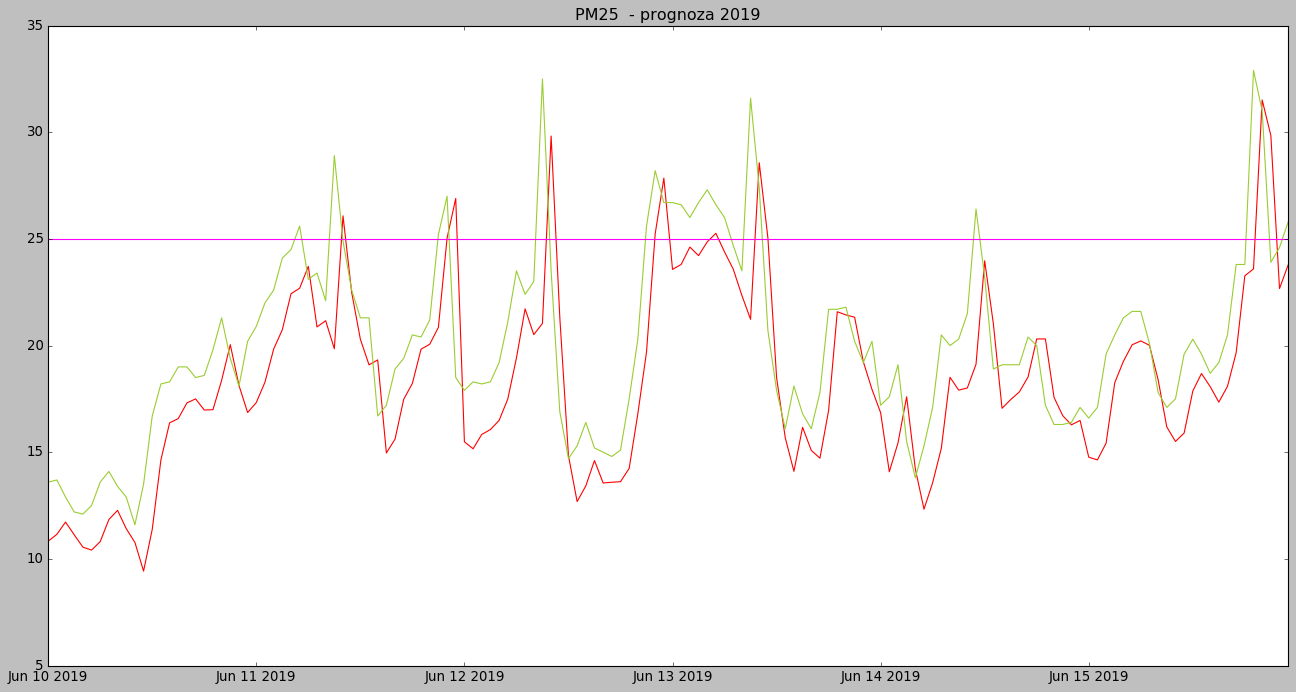

In [289]:
plt.style.use("classic")
mc = 6
d1 = 10
d2 = 15

jeden = do_wykresu_D[do_wykresu_D['month']>=mc][do_wykresu_D['month']<=mc][do_wykresu_D['day']>=d1][do_wykresu_D['day']<=d2]
dwa = pm_D[pm_D['month']>=mc][pm_D['month']<=mc][pm_D['day']>=d1][pm_D['day']<=d2]
alert = dwa.copy()
alert["pm25_nie"]=25

plt.figure(figsize=(20,10))
plt.plot(jeden['czas'], jeden['pred_xgb'], color='red') #prognoza
plt.plot(dwa['czas'], dwa['pm25_nie'], color='yellowgreen') #historia
plt.plot(alert['czas'], alert['pm25_nie'], color='fuchsia') #poziom alert

plt.title('PM25  - prognoza 2019')
plt.show()

In [244]:
%store model
%store model_xgb
%store model_xgb2

Stored 'model' (Sequential)
Stored 'model_xgb' (XGBRegressor)
Stored 'model_xgb2' (XGBRegressor)


In [245]:
# %store -r - Refresh all variables, aliases and directory history
# %store -r spam bar - Refresh specified variables and aliases from store

In [276]:
%store df
%store df2
%store feats
%store feats2
%store estimatesX
%store estimatesX2
%store future
%store pm
%store do_wykresu
%store klasyfikacja
%store X_train 
%store y_train
%store X_train2
%store y_train2
%store deep_X_train
%store deep_y_train

Stored 'df' (DataFrame)
Stored 'df2' (DataFrame)
Stored 'feats' (list)
Stored 'feats2' (list)
Stored 'estimatesX' (ndarray)
Stored 'estimatesX2' (ndarray)
Stored 'future' (DataFrame)
Stored 'pm' (DataFrame)
Stored 'do_wykresu' (DataFrame)
Stored 'klasyfikacja' (DataFrame)
Stored 'X_train' (ndarray)
Stored 'y_train' (ndarray)
Stored 'X_train2' (ndarray)
Stored 'y_train2' (ndarray)
Stored 'deep_X_train' (DataFrame)
Stored 'deep_y_train' (DataFrame)
